# Mount my drive

In [2]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2')

In [0]:
!ls

data	       main.py		      requirements.txt	utils
DataLoader     MNIST_binary_V2.ipynb  results_loss_acc	visualize
distributions  README.md	      trained_models


# MNIST binary

## Import

In [0]:
from torch.cuda import is_available
import torch.optim as optim
from DataLoader.dataLoaders import get_mnist_dataloaders
from utils.training import training, test, gpu_config
from torch import load
from visualize.viz import visTensor, visualize_activations
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch

from utils.models import NonBinaryNet, BinaryNet

import numpy as np

## Parameters

In [0]:
# parameters default values
lr = 0.1
momentum = 0.9
nb_epoch = 10
batch_size_train = 64
batch_size_test = 1000
slope_annealing = False
reinforce = False
stochastic = True
binary = True
plot_result = True
first_conv_layer = False
last_conv_layer = False
omniglto = True

## Define dataset

In [0]:
# Dataset
train_loader, valid_loader, test_loader, classes = get_mnist_dataloaders(batch_size_train, batch_size_test)

Number of validation examples: 6000
Number of training examples: 844
Number of testing examples: 10


## Define my model

In [0]:
# Model, activation type, estimator type
def get_my_model(omniglot, binary, stochastic, reinforce, first_conv_layer,
                 last_conv_layer):
    if binary:
        if stochastic:
            mode = 'Stochastic'
            names_model = 'Stochastic'
        else:
            mode = 'Deterministic'
            names_model = 'Deterministic'
        if reinforce:
            estimator = 'REINFORCE'
            names_model += '_REINFORCE'
        else:
            estimator = 'ST'
            names_model += '_ST'
        if first_conv_layer:
            names_model += '_first_conv_binary'
        if last_conv_layer:
            names_model += '_last_conv_binary'
        if omniglot:
            names_model += '_last_conv_binary'
        model = BinaryNet(omniglot=omniglot, first_conv_layer=first_conv_layer, 
                          last_conv_layer=last_conv_layer, mode=mode, 
                          estimator=estimator)
    else:
        if omniglot:
            names_model += '_last_conv_binary'
        model = NonBinaryNet(omniglot=omniglot)
        names_model = 'NonBinaryNet'
        mode = None
        estimator = None

    # gpu config:
    model, use_gpu = gpu_config(model)
    return model, names_model

## Train

### Train no binary model:

NonBinaryNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer1): Hardsigmoid(
    (act): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer2): Hardsigmoid(
    (act): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)
# Epoch : 0 - Slope : 1.0


/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.0887, Accuracy: 5830/6000 (97%)

Epoch: 01 | Epoch Time: 0m 8s
	Train Loss: 0.622 | Train Acc: 91.03%
	 Val. Loss: 0.089 |  Val. Acc: 97.17%
# Epoch : 1 - Slope : 1.0
Test set: Average loss: 0.0725, Accuracy: 5859/6000 (98%)

Epoch: 02 | Epoch Time: 0m 8s
	Train Loss: 0.070 | Train Acc: 97.80%
	 Val. Loss: 0.073 |  Val. Acc: 97.65%
# Epoch : 2 - Slope : 1.0
Test set: Average loss: 0.0553, Accuracy: 5889/6000 (98%)

Epoch: 03 | Epoch Time: 0m 8s
	Train Loss: 0.052 | Train Acc: 98.37%
	 Val. Loss: 0.055 |  Val. Acc: 98.15%
# Epoch : 3 - Slope : 1.0
Test set: Average loss: 0.0480, Accuracy: 5915/6000 (99%)

Epoch: 04 | Epoch Time: 0m 8s
	Train Loss: 0.043 | Train Acc: 98.69%
	 Val. Loss: 0.048 |  Val. Acc: 98.58%
# Epoch : 4 - Slope : 1.0
Test set: Average loss: 0.0513, Accuracy: 5900/6000 (98%)

Epoch: 05 | Epoch Time: 0m 8s
	Train Loss: 0.037 | Train Acc: 98.86%
	 Val. Loss: 0.051 |  Val. Acc: 98.33%
# Epoch : 5 - Slope : 1.0
Test set: Average loss: 0.0456, Acc

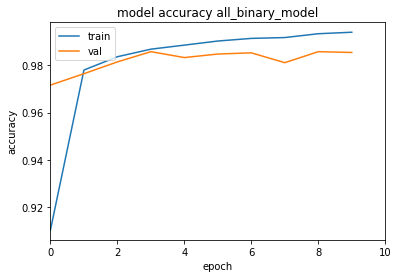

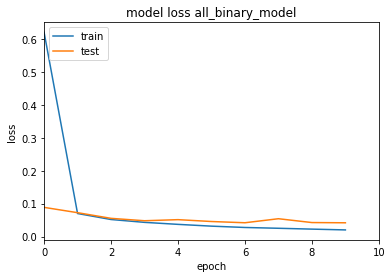

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.0341, Accuracy: 9879/10000 (99%)



In [0]:
# parameters no binary model
slope_annealing = False
stochastic = False
reinforce = False
binary = False
plot_result = True
first_conv_layer = False
last_conv_layer = False

# Slope annealing
if slope_annealing:
    def get_slope(number_epoch): return 1.0 * (1.005 ** (number_epoch - 1))
else:
    def get_slope(number_epoch): return 1.0
    
model, names_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
print(model)

# optimizer
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, names_model,
                                                    nb_epoch, train_loader, 
                                                    valid_loader, optimizer, 
                                                    plot_result, get_slope)

# test
model.load_state_dict(load('./trained_models/MNIST/' + names_model + '.pt'))
test_loss, test_acc = test(use_gpu, model, test_loader, get_slope, epoch=0)

results_binary_models[names_model + '_loss'] = test_loss
results_binary_models[names_model + '_acc'] = test_acc

### Train Binary models

#### Stochastic binary model in the first conv layer with ST:

In [0]:
results_binary_models = {}

Stochastic_ST_first_conv_binary
BinaryNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer1): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer2): Hardsigmoid(
    (act): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)
# Epoch : 0 - Slope : 1.0


/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.1896, Accuracy: 5672/6000 (95%)

Epoch: 01 | Epoch Time: 0m 9s
	Train Loss: 0.948 | Train Acc: 80.23%
	 Val. Loss: 0.190 |  Val. Acc: 94.53%
# Epoch : 1 - Slope : 1.0
Test set: Average loss: 0.1352, Accuracy: 5751/6000 (96%)

Epoch: 02 | Epoch Time: 0m 9s
	Train Loss: 0.153 | Train Acc: 95.28%
	 Val. Loss: 0.135 |  Val. Acc: 95.85%
# Epoch : 2 - Slope : 1.0
Test set: Average loss: 0.1076, Accuracy: 5812/6000 (97%)

Epoch: 03 | Epoch Time: 0m 9s
	Train Loss: 0.115 | Train Acc: 96.46%
	 Val. Loss: 0.108 |  Val. Acc: 96.87%
# Epoch : 3 - Slope : 1.0
Test set: Average loss: 0.0969, Accuracy: 5809/6000 (97%)

Epoch: 04 | Epoch Time: 0m 9s
	Train Loss: 0.094 | Train Acc: 97.08%
	 Val. Loss: 0.097 |  Val. Acc: 96.82%
# Epoch : 4 - Slope : 1.0
Test set: Average loss: 0.0799, Accuracy: 5855/6000 (98%)

Epoch: 05 | Epoch Time: 0m 9s
	Train Loss: 0.080 | Train Acc: 97.52%
	 Val. Loss: 0.080 |  Val. Acc: 97.58%
# Epoch : 5 - Slope : 1.0
Test set: Average loss: 0.0736, Acc

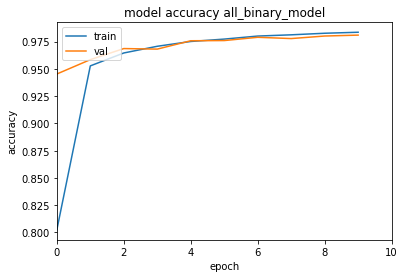

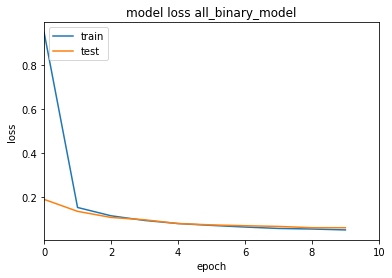

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.0540, Accuracy: 9829/10000 (98%)



In [0]:
# parameters no binary model
slope_annealing = True
stochastic = True
reinforce = False
binary = True
plot_result = True
first_conv_layer = True
last_conv_layer = False

# Slope annealing
if slope_annealing:
    def get_slope(number_epoch): return 1.0 * (1.005 ** (number_epoch - 1))
else:
    def get_slope(number_epoch): return 1.0
    
model, names_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
print(names_model)
print(model)

# optimizer
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, names_model,
                                                    nb_epoch, train_loader, 
                                                    valid_loader, optimizer, 
                                                    plot_result, get_slope)

# test
model.load_state_dict(load('./trained_models/MNIST/' + names_model + '.pt'))
test_loss, test_acc = test(use_gpu, model, test_loader, get_slope, epoch=0)

results_binary_models[names_model + '_loss'] = test_loss
results_binary_models[names_model + '_acc'] = test_acc

#### Stochastic binary model in the last conv layer with ST:

Stochastic_ST_last_conv_binary
BinaryNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer1): Hardsigmoid(
    (act): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer2): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)
# Epoch : 0 - Slope : 1.0


/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.1301, Accuracy: 5754/6000 (96%)

Epoch: 01 | Epoch Time: 0m 9s
	Train Loss: 0.701 | Train Acc: 89.74%
	 Val. Loss: 0.130 |  Val. Acc: 95.90%
# Epoch : 1 - Slope : 1.0
Test set: Average loss: 0.0996, Accuracy: 5807/6000 (97%)

Epoch: 02 | Epoch Time: 0m 9s
	Train Loss: 0.108 | Train Acc: 96.53%
	 Val. Loss: 0.100 |  Val. Acc: 96.78%
# Epoch : 2 - Slope : 1.0
Test set: Average loss: 0.0812, Accuracy: 5839/6000 (97%)

Epoch: 03 | Epoch Time: 0m 9s
	Train Loss: 0.085 | Train Acc: 97.34%
	 Val. Loss: 0.081 |  Val. Acc: 97.32%
# Epoch : 3 - Slope : 1.0
Test set: Average loss: 0.0883, Accuracy: 5831/6000 (97%)

Epoch: 04 | Epoch Time: 0m 9s
	Train Loss: 0.072 | Train Acc: 97.76%
	 Val. Loss: 0.088 |  Val. Acc: 97.18%
# Epoch : 4 - Slope : 1.0
Test set: Average loss: 0.0654, Accuracy: 5875/6000 (98%)

Epoch: 05 | Epoch Time: 0m 9s
	Train Loss: 0.063 | Train Acc: 97.94%
	 Val. Loss: 0.065 |  Val. Acc: 97.92%
# Epoch : 5 - Slope : 1.0
Test set: Average loss: 0.0744, Acc

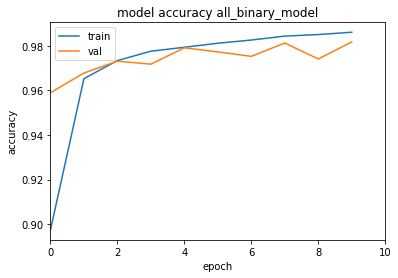

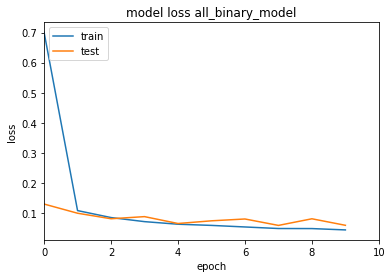

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.0535, Accuracy: 9831/10000 (98%)



In [0]:
# parameters no binary model
slope_annealing = True
stochastic = True
reinforce = False
binary = True
plot_result = True
first_conv_layer = False
last_conv_layer = True

model, names_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
print(names_model)
print(model)

# optimizer
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, names_model,
                                                    nb_epoch, train_loader, 
                                                    valid_loader, optimizer, 
                                                    plot_result, get_slope)

# test
model.load_state_dict(load('./trained_models/MNIST/' + names_model + '.pt'))
test_loss, test_acc = test(use_gpu, model, test_loader, get_slope, epoch=0)

results_binary_models[names_model + '_loss'] = test_loss
results_binary_models[names_model + '_acc'] = test_acc

#### Stochastic binary model in the both conv layer with ST:

Stochastic_ST_first_conv_binary_last_conv_binary
BinaryNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer1): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer2): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)
# Epoch : 0 - Slope : 1.0


/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.2162, Accuracy: 5571/6000 (93%)

Epoch: 01 | Epoch Time: 0m 9s
	Train Loss: 0.976 | Train Acc: 79.77%
	 Val. Loss: 0.216 |  Val. Acc: 92.85%
# Epoch : 1 - Slope : 1.0
Test set: Average loss: 0.1540, Accuracy: 5701/6000 (95%)

Epoch: 02 | Epoch Time: 0m 9s
	Train Loss: 0.171 | Train Acc: 94.62%
	 Val. Loss: 0.154 |  Val. Acc: 95.02%
# Epoch : 2 - Slope : 1.0
Test set: Average loss: 0.1301, Accuracy: 5758/6000 (96%)

Epoch: 03 | Epoch Time: 0m 9s
	Train Loss: 0.140 | Train Acc: 95.57%
	 Val. Loss: 0.130 |  Val. Acc: 95.97%
# Epoch : 3 - Slope : 1.0
Test set: Average loss: 0.1343, Accuracy: 5745/6000 (96%)

Epoch: 04 | Epoch Time: 0m 9s
	Train Loss: 0.119 | Train Acc: 96.20%
	 Val. Loss: 0.134 |  Val. Acc: 95.75%
# Epoch : 4 - Slope : 1.0
Test set: Average loss: 0.1180, Accuracy: 5767/6000 (96%)

Epoch: 05 | Epoch Time: 0m 9s
	Train Loss: 0.107 | Train Acc: 96.58%
	 Val. Loss: 0.118 |  Val. Acc: 96.12%
# Epoch : 5 - Slope : 1.0
Test set: Average loss: 0.1043, Acc

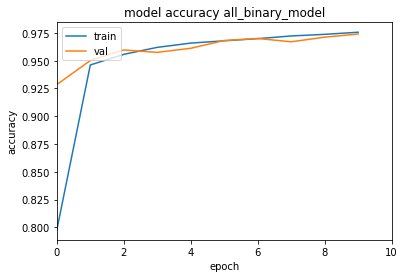

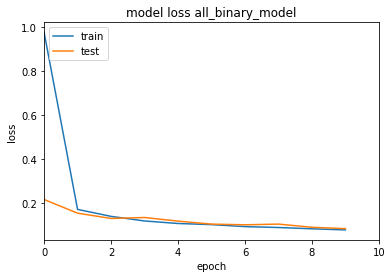

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.0711, Accuracy: 9754/10000 (98%)



In [0]:
# parameters no binary model
slope_annealing = True
stochastic = True
reinforce = False
binary = True
plot_result = True
first_conv_layer = True
last_conv_layer = True

model, names_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
print(names_model)
print(model)

# optimizer
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, names_model,
                                                    nb_epoch, train_loader, 
                                                    valid_loader, optimizer, 
                                                    plot_result, get_slope)

# test
model.load_state_dict(load('./trained_models/MNIST/' + names_model + '.pt'))
test_loss, test_acc = test(use_gpu, model, test_loader, get_slope, epoch=0)

results_binary_models[names_model + '_loss'] = test_loss
results_binary_models[names_model + '_acc'] = test_acc

#### Deterministic binary model in the first conv layer with ST:

Deterministic_ST_first_conv_binary
BinaryNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer1): DeterministicBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer2): Hardsigmoid(
    (act): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)
# Epoch : 0 - Slope : 1.0


/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.0906, Accuracy: 5830/6000 (97%)

Epoch: 01 | Epoch Time: 0m 9s
	Train Loss: 0.588 | Train Acc: 90.98%
	 Val. Loss: 0.091 |  Val. Acc: 97.17%
# Epoch : 1 - Slope : 1.0
Test set: Average loss: 0.0972, Accuracy: 5805/6000 (97%)

Epoch: 02 | Epoch Time: 0m 9s
	Train Loss: 0.075 | Train Acc: 97.69%
	 Val. Loss: 0.097 |  Val. Acc: 96.75%
# Epoch : 2 - Slope : 1.0
Test set: Average loss: 0.0541, Accuracy: 5883/6000 (98%)

Epoch: 03 | Epoch Time: 0m 8s
	Train Loss: 0.057 | Train Acc: 98.25%
	 Val. Loss: 0.054 |  Val. Acc: 98.05%
# Epoch : 3 - Slope : 1.0
Test set: Average loss: 0.0572, Accuracy: 5882/6000 (98%)

Epoch: 04 | Epoch Time: 0m 9s
	Train Loss: 0.048 | Train Acc: 98.49%
	 Val. Loss: 0.057 |  Val. Acc: 98.03%
# Epoch : 4 - Slope : 1.0
Test set: Average loss: 0.0446, Accuracy: 5912/6000 (99%)

Epoch: 05 | Epoch Time: 0m 9s
	Train Loss: 0.041 | Train Acc: 98.69%
	 Val. Loss: 0.045 |  Val. Acc: 98.53%
# Epoch : 5 - Slope : 1.0
Test set: Average loss: 0.0514, Acc

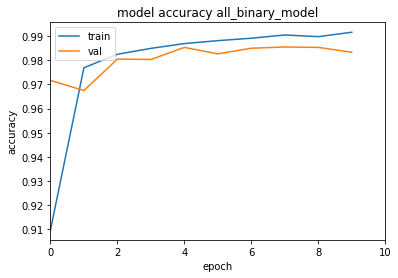

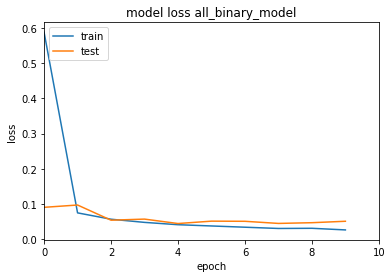

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.0391, Accuracy: 9865/10000 (99%)



In [0]:
# parameters no binary model
slope_annealing = True
stochastic = False
reinforce = False
binary = True
plot_result = True
first_conv_layer = True
last_conv_layer = False

model, names_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
print(names_model)
print(model)

# optimizer
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, names_model,
                                                    nb_epoch, train_loader, 
                                                    valid_loader, optimizer, 
                                                    plot_result, get_slope)

# test
model.load_state_dict(load('./trained_models/MNIST/' + names_model + '.pt'))
test_loss, test_acc = test(use_gpu, model, test_loader, get_slope, epoch=0)

results_binary_models[names_model + '_loss'] = test_loss
results_binary_models[names_model + '_acc'] = test_acc

#### Deterministic binary model in the last conv layer with ST:

Deterministic_ST_last_conv_binary
BinaryNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer1): Hardsigmoid(
    (act): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer2): DeterministicBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)
# Epoch : 0 - Slope : 1.0


/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.2204, Accuracy: 5592/6000 (93%)

Epoch: 01 | Epoch Time: 0m 9s
	Train Loss: 0.789 | Train Acc: 85.23%
	 Val. Loss: 0.220 |  Val. Acc: 93.20%
# Epoch : 1 - Slope : 1.0
Test set: Average loss: 0.1388, Accuracy: 5748/6000 (96%)

Epoch: 02 | Epoch Time: 0m 9s
	Train Loss: 0.148 | Train Acc: 95.40%
	 Val. Loss: 0.139 |  Val. Acc: 95.80%
# Epoch : 2 - Slope : 1.0
Test set: Average loss: 0.0987, Accuracy: 5806/6000 (97%)

Epoch: 03 | Epoch Time: 0m 9s
	Train Loss: 0.113 | Train Acc: 96.48%
	 Val. Loss: 0.099 |  Val. Acc: 96.77%
# Epoch : 3 - Slope : 1.0
Test set: Average loss: 0.0940, Accuracy: 5811/6000 (97%)

Epoch: 04 | Epoch Time: 0m 9s
	Train Loss: 0.095 | Train Acc: 97.03%
	 Val. Loss: 0.094 |  Val. Acc: 96.85%
# Epoch : 4 - Slope : 1.0
Test set: Average loss: 0.0871, Accuracy: 5825/6000 (97%)

Epoch: 05 | Epoch Time: 0m 8s
	Train Loss: 0.085 | Train Acc: 97.31%
	 Val. Loss: 0.087 |  Val. Acc: 97.08%
# Epoch : 5 - Slope : 1.0
Test set: Average loss: 0.0873, Acc

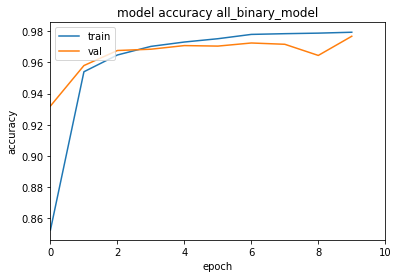

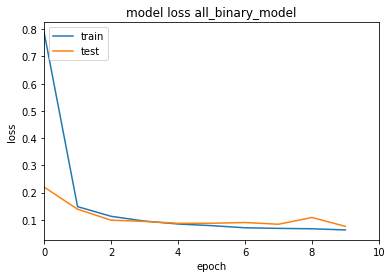

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.0743, Accuracy: 9781/10000 (98%)



In [0]:
# parameters no binary model
slope_annealing = True
stochastic = False
reinforce = False
binary = True
plot_result = True
first_conv_layer = False
last_conv_layer = True

model, names_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
print(names_model)
print(model)

# optimizer
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, names_model,
                                                    nb_epoch, train_loader, 
                                                    valid_loader, optimizer, 
                                                    plot_result, get_slope)

# test
model.load_state_dict(load('./trained_models/MNIST/' + names_model + '.pt'))
test_loss, test_acc = test(use_gpu, model, test_loader, get_slope, epoch=0)

results_binary_models[names_model + '_loss'] = test_loss
results_binary_models[names_model + '_acc'] = test_acc

#### Deterministic binary model in the both conv layer with ST:

Deterministic_ST_first_conv_binary_last_conv_binary
BinaryNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer1): DeterministicBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer2): DeterministicBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)
# Epoch : 0 - Slope : 1.0


/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.1989, Accuracy: 5619/6000 (94%)

Epoch: 01 | Epoch Time: 0m 8s
	Train Loss: 0.766 | Train Acc: 86.73%
	 Val. Loss: 0.199 |  Val. Acc: 93.65%
# Epoch : 1 - Slope : 1.0
Test set: Average loss: 0.1144, Accuracy: 5789/6000 (96%)

Epoch: 02 | Epoch Time: 0m 8s
	Train Loss: 0.136 | Train Acc: 95.78%
	 Val. Loss: 0.114 |  Val. Acc: 96.48%
# Epoch : 2 - Slope : 1.0
Test set: Average loss: 0.1209, Accuracy: 5773/6000 (96%)

Epoch: 03 | Epoch Time: 0m 8s
	Train Loss: 0.109 | Train Acc: 96.58%
	 Val. Loss: 0.121 |  Val. Acc: 96.22%
# Epoch : 3 - Slope : 1.0
Test set: Average loss: 1.9114, Accuracy: 4930/6000 (82%)

Epoch: 04 | Epoch Time: 0m 8s
	Train Loss: 0.097 | Train Acc: 96.90%
	 Val. Loss: 1.911 |  Val. Acc: 82.17%
# Epoch : 4 - Slope : 1.0
Test set: Average loss: 0.1030, Accuracy: 5816/6000 (97%)

Epoch: 05 | Epoch Time: 0m 8s
	Train Loss: 0.085 | Train Acc: 97.30%
	 Val. Loss: 0.103 |  Val. Acc: 96.93%
# Epoch : 5 - Slope : 1.0
Test set: Average loss: 0.0828, Acc

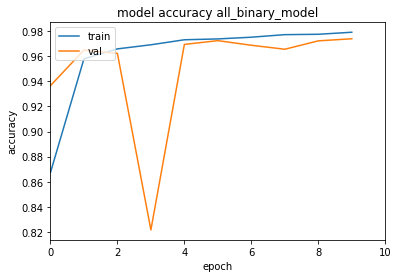

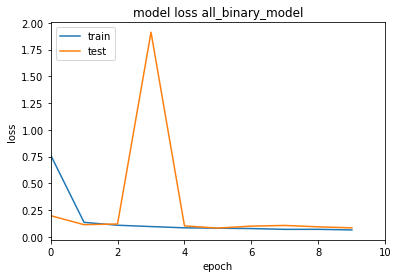

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.0745, Accuracy: 9757/10000 (98%)



In [0]:
# parameters no binary model
slope_annealing = True
stochastic = False
reinforce = False
binary = True
plot_result = True
first_conv_layer = True
last_conv_layer = True

model, names_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
print(names_model)
print(model)

# optimizer
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, names_model,
                                                    nb_epoch, train_loader, 
                                                    valid_loader, optimizer, 
                                                    plot_result, get_slope)

# test
model.load_state_dict(load('./trained_models/MNIST/' + names_model + '.pt'))
test_loss, test_acc = test(use_gpu, model, test_loader, get_slope, epoch=0)

results_binary_models[names_model + '_loss'] = test_loss
results_binary_models[names_model + '_acc'] = test_acc

#### Stochastic binary model in the first conv layer with REINFORCE:

Stochastic_REINFORCE_first_conv_binary
BinaryNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer1): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer2): Hardsigmoid(
    (act): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)
# Epoch : 0 - Slope : 1.0


/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.1869, Accuracy: 5657/6000 (94%)

Epoch: 01 | Epoch Time: 0m 8s
	Train Loss: 0.835 | Train Acc: 83.33%
	 Val. Loss: 0.187 |  Val. Acc: 94.28%
# Epoch : 1 - Slope : 1.0
Test set: Average loss: 0.1242, Accuracy: 5771/6000 (96%)

Epoch: 02 | Epoch Time: 0m 8s
	Train Loss: 0.146 | Train Acc: 95.42%
	 Val. Loss: 0.124 |  Val. Acc: 96.18%
# Epoch : 2 - Slope : 1.0
Test set: Average loss: 0.1079, Accuracy: 5787/6000 (96%)

Epoch: 03 | Epoch Time: 0m 8s
	Train Loss: 0.118 | Train Acc: 96.30%
	 Val. Loss: 0.108 |  Val. Acc: 96.45%
# Epoch : 3 - Slope : 1.0
Test set: Average loss: 0.1105, Accuracy: 5799/6000 (97%)

Epoch: 04 | Epoch Time: 0m 8s
	Train Loss: 0.103 | Train Acc: 96.68%
	 Val. Loss: 0.110 |  Val. Acc: 96.65%
# Epoch : 4 - Slope : 1.0
Test set: Average loss: 0.1198, Accuracy: 5767/6000 (96%)

Epoch: 05 | Epoch Time: 0m 8s
	Train Loss: 0.097 | Train Acc: 96.93%
	 Val. Loss: 0.120 |  Val. Acc: 96.12%
# Epoch : 5 - Slope : 1.0
Test set: Average loss: 0.0889, Acc

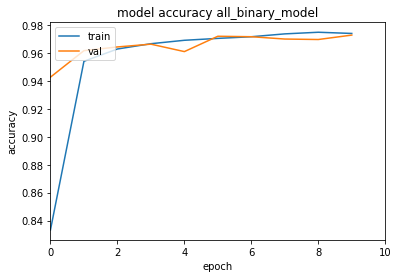

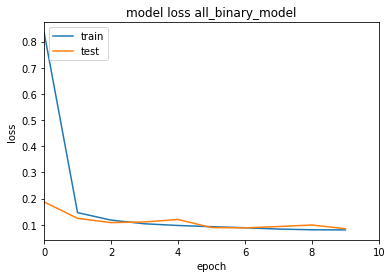

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.0749, Accuracy: 9756/10000 (98%)



In [0]:
# parameters no binary model
slope_annealing = False
stochastic = True
reinforce = True
binary = True
plot_result = True
first_conv_layer = True
last_conv_layer = False

model, names_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
print(names_model)
print(model)

# optimizer
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, names_model,
                                                    nb_epoch, train_loader, 
                                                    valid_loader, optimizer, 
                                                    plot_result, get_slope)

# test
model.load_state_dict(load('./trained_models/MNIST/' + names_model + '.pt'))
test_loss, test_acc = test(use_gpu, model, test_loader, get_slope, epoch=0)

results_binary_models[names_model + '_loss'] = test_loss
results_binary_models[names_model + '_acc'] = test_acc

#### Stochastic binary model in the last conv layer with REINFORCE:

Stochastic_REINFORCE_last_conv_binary
BinaryNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer1): Hardsigmoid(
    (act): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer2): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)
# Epoch : 0 - Slope : 1.0


/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 1.3973, Accuracy: 5267/6000 (88%)

Epoch: 01 | Epoch Time: 0m 8s
	Train Loss: 6.004 | Train Acc: 77.66%
	 Val. Loss: 1.397 |  Val. Acc: 87.78%
# Epoch : 1 - Slope : 1.0
Test set: Average loss: 1.7252, Accuracy: 5129/6000 (85%)

Epoch: 02 | Epoch Time: 0m 8s
	Train Loss: 1.884 | Train Acc: 84.91%
	 Val. Loss: 1.725 |  Val. Acc: 85.48%
# Epoch : 2 - Slope : 1.0
Test set: Average loss: 1.5844, Accuracy: 5294/6000 (88%)

Epoch: 03 | Epoch Time: 0m 9s
	Train Loss: 1.910 | Train Acc: 85.53%
	 Val. Loss: 1.584 |  Val. Acc: 88.23%
# Epoch : 3 - Slope : 1.0
Test set: Average loss: 1.9515, Accuracy: 5165/6000 (86%)

Epoch: 04 | Epoch Time: 0m 9s
	Train Loss: 1.724 | Train Acc: 86.94%
	 Val. Loss: 1.952 |  Val. Acc: 86.08%
# Epoch : 4 - Slope : 1.0
Test set: Average loss: 1.7159, Accuracy: 5252/6000 (88%)

Epoch: 05 | Epoch Time: 0m 9s
	Train Loss: 1.871 | Train Acc: 86.62%
	 Val. Loss: 1.716 |  Val. Acc: 87.53%
# Epoch : 5 - Slope : 1.0
Test set: Average loss: 2.5128, Acc

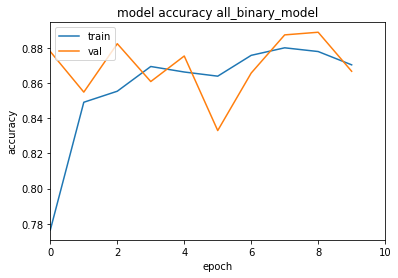

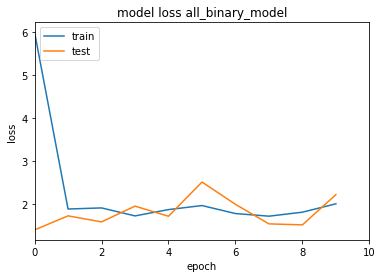

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 1.2811, Accuracy: 8895/10000 (89%)



In [0]:
# parameters no binary model
slope_annealing = False
stochastic = True
reinforce = True
binary = True
plot_result = True
first_conv_layer = False
last_conv_layer = True

model, names_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
print(names_model)
print(model)

# optimizer
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, names_model,
                                                    nb_epoch, train_loader, 
                                                    valid_loader, optimizer, 
                                                    plot_result, get_slope)

# test
model.load_state_dict(load('./trained_models/MNIST/' + names_model + '.pt'))
test_loss, test_acc = test(use_gpu, model, test_loader, get_slope, epoch=0)

results_binary_models[names_model + '_loss'] = test_loss
results_binary_models[names_model + '_acc'] = test_acc

#### Stochastic binary model in the both conv layer with REINFORCE:

Stochastic_REINFORCE_first_conv_binary_last_conv_binary
BinaryNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer1): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer2): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)
# Epoch : 0 - Slope : 1.0


/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 3.8409, Accuracy: 4483/6000 (75%)

Epoch: 01 | Epoch Time: 0m 9s
	Train Loss: 15.452 | Train Acc: 62.45%
	 Val. Loss: 3.841 |  Val. Acc: 74.72%
# Epoch : 1 - Slope : 1.0
Test set: Average loss: 5.5501, Accuracy: 4129/6000 (69%)

Epoch: 02 | Epoch Time: 0m 9s
	Train Loss: 4.790 | Train Acc: 72.22%
	 Val. Loss: 5.550 |  Val. Acc: 68.82%
# Epoch : 2 - Slope : 1.0
Test set: Average loss: 5.8242, Accuracy: 4187/6000 (70%)

Epoch: 03 | Epoch Time: 0m 9s
	Train Loss: 4.589 | Train Acc: 74.38%
	 Val. Loss: 5.824 |  Val. Acc: 69.78%
# Epoch : 3 - Slope : 1.0
Test set: Average loss: 3.8124, Accuracy: 4604/6000 (77%)

Epoch: 04 | Epoch Time: 0m 9s
	Train Loss: 4.427 | Train Acc: 75.08%
	 Val. Loss: 3.812 |  Val. Acc: 76.73%
# Epoch : 4 - Slope : 1.0
Test set: Average loss: 3.4663, Accuracy: 4812/6000 (80%)

Epoch: 05 | Epoch Time: 0m 9s
	Train Loss: 4.565 | Train Acc: 75.30%
	 Val. Loss: 3.466 |  Val. Acc: 80.20%
# Epoch : 5 - Slope : 1.0
Test set: Average loss: 5.3479, Ac

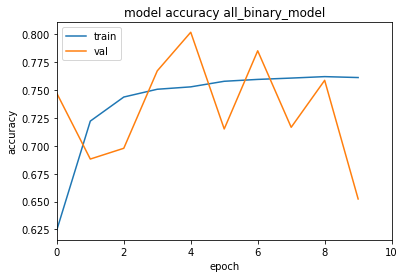

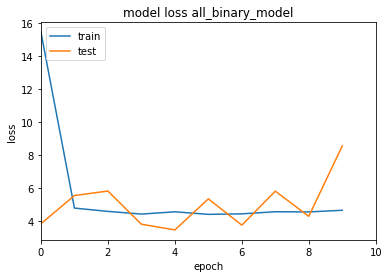

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 3.2085, Accuracy: 8068/10000 (81%)



In [0]:
# parameters no binary model
slope_annealing = False
stochastic = True
reinforce = True
binary = True
plot_result = True
first_conv_layer = True
last_conv_layer = True

model, names_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
print(names_model)
print(model)

# optimizer
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, names_model,
                                                    nb_epoch, train_loader, 
                                                    valid_loader, optimizer, 
                                                    plot_result, get_slope)

# test
model.load_state_dict(load('./trained_models/MNIST/' + names_model + '.pt'))
test_loss, test_acc = test(use_gpu, model, test_loader, get_slope, epoch=0)

results_binary_models[names_model + '_loss'] = test_loss
results_binary_models[names_model + '_acc'] = test_acc

#### Deterministic binary model in the first conv layer with REINFORCE:

Deterministic_REINFORCE_first_conv_binary
BinaryNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer1): DeterministicBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer2): Hardsigmoid(
    (act): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)
# Epoch : 0 - Slope : 1.0


/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.1454, Accuracy: 5750/6000 (96%)

Epoch: 01 | Epoch Time: 0m 9s
	Train Loss: 0.776 | Train Acc: 86.08%
	 Val. Loss: 0.145 |  Val. Acc: 95.83%
# Epoch : 1 - Slope : 1.0
Test set: Average loss: 0.1161, Accuracy: 5792/6000 (97%)

Epoch: 02 | Epoch Time: 0m 9s
	Train Loss: 0.118 | Train Acc: 96.31%
	 Val. Loss: 0.116 |  Val. Acc: 96.53%
# Epoch : 2 - Slope : 1.0
Test set: Average loss: 0.0955, Accuracy: 5810/6000 (97%)

Epoch: 03 | Epoch Time: 0m 9s
	Train Loss: 0.091 | Train Acc: 97.16%
	 Val. Loss: 0.095 |  Val. Acc: 96.83%
# Epoch : 3 - Slope : 1.0
Test set: Average loss: 0.0968, Accuracy: 5809/6000 (97%)

Epoch: 04 | Epoch Time: 0m 9s
	Train Loss: 0.077 | Train Acc: 97.59%
	 Val. Loss: 0.097 |  Val. Acc: 96.82%
# Epoch : 4 - Slope : 1.0
Test set: Average loss: 0.0853, Accuracy: 5833/6000 (97%)

Epoch: 05 | Epoch Time: 0m 8s
	Train Loss: 0.070 | Train Acc: 97.78%
	 Val. Loss: 0.085 |  Val. Acc: 97.22%
# Epoch : 5 - Slope : 1.0
Test set: Average loss: 0.0829, Acc

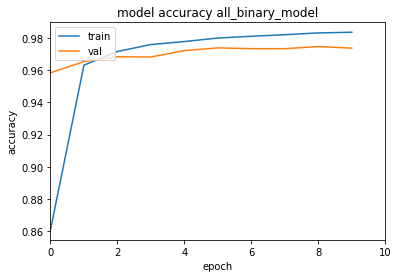

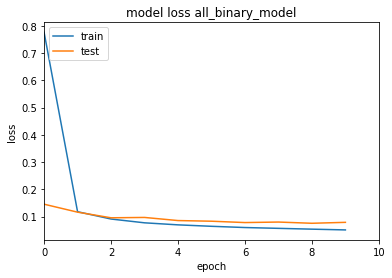

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.0685, Accuracy: 9776/10000 (98%)



In [0]:
# parameters no binary model
slope_annealing = False
stochastic = False
reinforce = True
binary = True
plot_result = True
first_conv_layer = True
last_conv_layer = False

model, names_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
print(names_model)
print(model)

# optimizer
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, names_model,
                                                    nb_epoch, train_loader, 
                                                    valid_loader, optimizer, 
                                                    plot_result, get_slope)

# test
model.load_state_dict(load('./trained_models/MNIST/' + names_model + '.pt'))
test_loss, test_acc = test(use_gpu, model, test_loader, get_slope, epoch=0)

results_binary_models[names_model + '_loss'] = test_loss
results_binary_models[names_model + '_acc'] = test_acc

#### Deterministic binary model in the last conv layer with REINFORCE:

Deterministic_REINFORCE_last_conv_binary
BinaryNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer1): Hardsigmoid(
    (act): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer2): DeterministicBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)
# Epoch : 0 - Slope : 1.0


/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 1.0821, Accuracy: 5403/6000 (90%)

Epoch: 01 | Epoch Time: 0m 9s
	Train Loss: 5.481 | Train Acc: 83.16%
	 Val. Loss: 1.082 |  Val. Acc: 90.05%
# Epoch : 1 - Slope : 1.0
Test set: Average loss: 0.7184, Accuracy: 5610/6000 (94%)

Epoch: 02 | Epoch Time: 0m 9s
	Train Loss: 1.134 | Train Acc: 90.29%
	 Val. Loss: 0.718 |  Val. Acc: 93.50%
# Epoch : 2 - Slope : 1.0
Test set: Average loss: 1.5037, Accuracy: 5286/6000 (88%)

Epoch: 03 | Epoch Time: 0m 9s
	Train Loss: 0.984 | Train Acc: 91.55%
	 Val. Loss: 1.504 |  Val. Acc: 88.10%
# Epoch : 3 - Slope : 1.0
Test set: Average loss: 0.6078, Accuracy: 5671/6000 (95%)

Epoch: 04 | Epoch Time: 0m 9s
	Train Loss: 0.844 | Train Acc: 92.63%
	 Val. Loss: 0.608 |  Val. Acc: 94.52%
# Epoch : 4 - Slope : 1.0
Test set: Average loss: 0.9463, Accuracy: 5551/6000 (93%)

Epoch: 05 | Epoch Time: 0m 8s
	Train Loss: 0.723 | Train Acc: 93.46%
	 Val. Loss: 0.946 |  Val. Acc: 92.52%
# Epoch : 5 - Slope : 1.0
Test set: Average loss: 0.7698, Acc

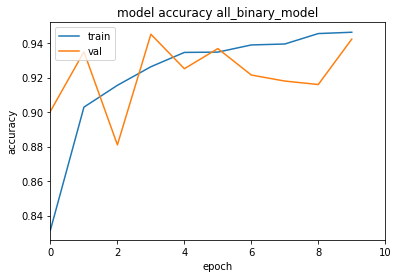

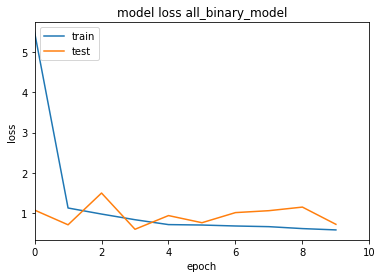

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.5570, Accuracy: 9542/10000 (95%)



In [0]:
# parameters no binary model
slope_annealing = False
stochastic = False
reinforce = True
binary = True
plot_result = True
first_conv_layer = False
last_conv_layer = True

model, names_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
print(names_model)
print(model)

# optimizer
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, names_model,
                                                    nb_epoch, train_loader, 
                                                    valid_loader, optimizer, 
                                                    plot_result, get_slope)

# test
model.load_state_dict(load('./trained_models/MNIST/' + names_model + '.pt'))
test_loss, test_acc = test(use_gpu, model, test_loader, get_slope, epoch=0)

results_binary_models[names_model + '_loss'] = test_loss
results_binary_models[names_model + '_acc'] = test_acc

#### Deterministic binary model in the both conv layer with REINFORCE:

Deterministic_REINFORCE_first_conv_binary_last_conv_binary
BinaryNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer1): DeterministicBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (act_layer2): DeterministicBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)
# Epoch : 0 - Slope : 1.0


/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 1.7764, Accuracy: 5232/6000 (87%)

Epoch: 01 | Epoch Time: 0m 9s
	Train Loss: 6.693 | Train Acc: 80.34%
	 Val. Loss: 1.776 |  Val. Acc: 87.20%
# Epoch : 1 - Slope : 1.0
Test set: Average loss: 2.4231, Accuracy: 5048/6000 (84%)

Epoch: 02 | Epoch Time: 0m 9s
	Train Loss: 1.421 | Train Acc: 88.79%
	 Val. Loss: 2.423 |  Val. Acc: 84.13%
# Epoch : 2 - Slope : 1.0
Test set: Average loss: 1.4668, Accuracy: 5345/6000 (89%)

Epoch: 03 | Epoch Time: 0m 9s
	Train Loss: 1.396 | Train Acc: 89.19%
	 Val. Loss: 1.467 |  Val. Acc: 89.08%
# Epoch : 3 - Slope : 1.0
Test set: Average loss: 1.8774, Accuracy: 5283/6000 (88%)

Epoch: 04 | Epoch Time: 0m 9s
	Train Loss: 1.257 | Train Acc: 90.36%
	 Val. Loss: 1.877 |  Val. Acc: 88.05%
# Epoch : 4 - Slope : 1.0
Test set: Average loss: 1.1166, Accuracy: 5498/6000 (92%)

Epoch: 05 | Epoch Time: 0m 9s
	Train Loss: 1.136 | Train Acc: 91.11%
	 Val. Loss: 1.117 |  Val. Acc: 91.63%
# Epoch : 5 - Slope : 1.0
Test set: Average loss: 1.1347, Acc

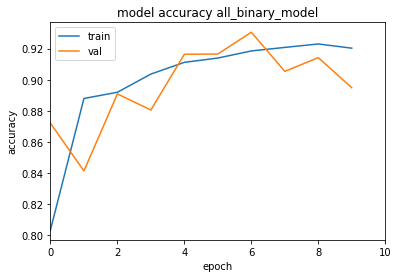

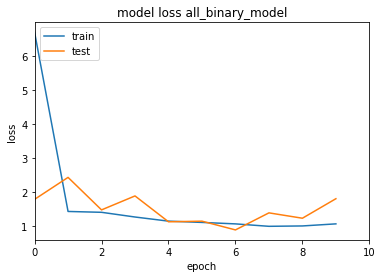

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_binary_V2/utils/training.py:83: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Average loss: 0.8539, Accuracy: 9340/10000 (93%)



In [0]:
# parameters no binary model
slope_annealing = False
stochastic = False
reinforce = True
binary = True
plot_result = True
first_conv_layer = True
last_conv_layer = True

model, names_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
print(names_model)
print(model)

# optimizer
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, names_model,
                                                    nb_epoch, train_loader, 
                                                    valid_loader, optimizer, 
                                                    plot_result, get_slope)

# test
model.load_state_dict(load('./trained_models/MNIST/' + names_model + '.pt'))
test_loss, test_acc = test(use_gpu, model, test_loader, get_slope, epoch=0)

results_binary_models[names_model + '_loss'] = test_loss
results_binary_models[names_model + '_acc'] = test_acc

## Results

### Resume results:

In [0]:
np.save('results/MNIST_results/all_results_loss_acc.npy', results_binary_models)

In [0]:
results_binary_models

{'Deterministic_REINFORCE_first_conv_binary_acc': tensor(0.9776),
 'Deterministic_REINFORCE_first_conv_binary_last_conv_binary_acc': tensor(0.9340),
 'Deterministic_REINFORCE_first_conv_binary_last_conv_binary_loss': 0.85386982421875,
 'Deterministic_REINFORCE_first_conv_binary_loss': 0.06845075035095215,
 'Deterministic_REINFORCE_last_conv_binary_acc': tensor(0.9542),
 'Deterministic_REINFORCE_last_conv_binary_loss': 0.5569720520019531,
 'Deterministic_ST_first_conv_binary_acc': tensor(0.9865),
 'Deterministic_ST_first_conv_binary_last_conv_binary_acc': tensor(0.9757),
 'Deterministic_ST_first_conv_binary_last_conv_binary_loss': 0.07450879859924317,
 'Deterministic_ST_first_conv_binary_loss': 0.03912734909057617,
 'Deterministic_ST_last_conv_binary_acc': tensor(0.9781),
 'Deterministic_ST_last_conv_binary_loss': 0.07434041786193847,
 'NonBinaryNet_acc': tensor(0.9879),
 'NonBinaryNet_loss': 0.034145405101776126,
 'Stochastic_REINFORCE_first_conv_binary_acc': tensor(0.9756),
 'Stochast

Array resume all results on MNIST with 10 epochs:

|               Models: 2 conv layers (29k parameters)              	|      Loss      	|  Accuracy (%)  	|
|:-----------------------------------------------------------------:	|:--------------:	|:--------------:	|
| No binary models                                                  	|     **0.0341**     	|      **98.79**     	|
|:-----------------------------------------------------------------:	|:--------------:	|:--------------:	|
| Stochastic binary model in the first conv layer with ST           	|     0.0539     	|      98.29     	|
| Stochastic binary model in the last conv layer with ST            	|     **0.0534**     	|      **98.31**     	|
| Stochastic binary model in the both conv layer with ST            	|     0.0710     	|      97.54     	|
| Stochastic binary model in the first conv layer with REINFORCE    	|     0.0749     	|      97.56     	|
| Stochastic binary model in the last conv layer with REINFORCE     	|     1.2811     	|      88.95     	|
| Stochastic binary model in the both conv layer with REINFORCE     	|     3.2085     	|      80.68     	|
|:-----------------------------------------------------------------:	|:--------------:	|:--------------:	|
| Deterministic binary model in the first conv layer with ST        	|     **0.03912**    	|      **98.65**     	|
| Deterministic binary model in the last conv layer with ST         	|     0.0743     	|      97.81     	|
| Deterministic binary model in the both conv layer with ST         	|     0.0745     	|      97.57     	|
| Deterministic binary model in the first conv layer with REINFORCE 	|     0.0684     	|      97.76     	|
| Deterministic binary model in the last conv layer with REINFORCE  	|     0.5569     	|      95.42     	|
| Deterministic binary model in the both conv layer with REINFORCE  	|     0.8538     	|      93.40     	|

In [0]:
all_results = np.load('results/MNIST_results/all_results_loss_acc.npy', allow_pickle=True)
# print(all_results)
# ex to obtain pecific key value:
print(all_results.item().get('Stochastic_ST_last_conv_binary_loss'))

0.053469522666931155


### Resume plots:

To print a loss or acc plot, choice 'plot_name' in the below list:

Accuracy:

*   'results/MNIST_results/plot_loss_acc/acc_model_' + 'NonBinaryNet' + '.png'
*   'results/MNIST_results/plot_loss_acc/acc_model_' + 'Deterministic_REINFORCE_first_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/acc_model_' + 'Deterministic_REINFORCE_last_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/acc_model_' + 'Deterministic_REINFORCE_first_conv_binary_last_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/acc_model_' + 'Deterministic_ST_first_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/acc_model_' + 'Deterministic_ST_last_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/acc_model_' + 'Deterministic_ST_first_conv_binary_last_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/acc_model_' + 'Stochastic_REINFORCE_first_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/acc_model_' + 'Stochastic_REINFORCE_last_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/acc_model_' + 'Stochastic_REINFORCE_first_conv_binary_last_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/acc_model_' + 'Stochastic_ST_last_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/acc_model_' + 'Stochastic_ST_first_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/acc_model_' + 'Stochastic_ST_first_conv_binary_last_conv_binary' + '.png'

Loss:

*   'results/MNIST_results/plot_loss_acc/loss_model_' + 'NonBinaryNet' + '.png'
*   'results/MNIST_results/plot_loss_acc/loss_model_' + 'Deterministic_REINFORCE_first_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/loss_model_' + 'Deterministic_REINFORCE_last_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/loss_model_' + 'Deterministic_REINFORCE_first_conv_binary_last_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/loss_model_' + 'Deterministic_ST_first_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/loss_model_' + 'Deterministic_ST_last_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/loss_model_' + 'Deterministic_ST_first_conv_binary_last_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/loss_model_' + 'Stochastic_REINFORCE_first_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/loss_model_' + 'Stochastic_REINFORCE_last_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/loss_model_' + 'Stochastic_REINFORCE_first_conv_binary_last_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/loss_model_' + 'Stochastic_ST_last_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/loss_model_' + 'Stochastic_ST_first_conv_binary' + '.png'
*   'results/MNIST_results/plot_loss_acc/loss_model_' + 'Stochastic_ST_first_conv_binary_last_conv_binary' + '.png'


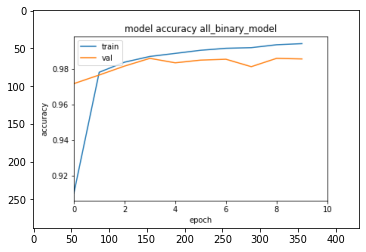

In [0]:
# choice 'plot_name' on the list above
plot_name = 'results/MNIST_results/plot_loss_acc/acc_model_' + 'NonBinaryNet' + '.png'
im = plt.imread(plot_name)
plt.imshow(im)

## Visualization

### Import visualize modules:

In [0]:
from visualize.viz import visTensor, get_activation

In [0]:
def viz_filters(model):
  filters = model.layer1[0].weight.data.clone()
  visTensor(filters.cpu(), ch=0, allkernels=False)
  plt.ioff()

  filters = model.layer2[0].weight.data.clone()
  visTensor(filters.cpu(), ch=0, allkernels=False)
  plt.ioff()
  return


def viz_activations(model, get_slope):
  activation = {}

  # to define slope
  slope = get_slope(0)
  
  model.act_layer1.register_forward_hook(get_activation('conv1', activation))
  model.act_layer2.register_forward_hook(get_activation('conv2', activation))
  data, _ = train_data[0]
  data.unsqueeze_(0)
  model.cpu()
  output = model((data, slope))

  # show activations conv1
  act_conv1 = activation['conv1'].squeeze()
  fig, axarr = plt.subplots(act_conv1.size(0), figsize=(50,50))
  print('conv1')
  for idx in range(act_conv1.size(0)):
      axarr[idx].imshow(act_conv1[idx])
  plt.show()

  # show activations conv1
  act_conv2 = activation['conv2'].squeeze()
  fig, axarr = plt.subplots(act_conv2.size(0), figsize=(50,50))
  print('conv2')
  for idx in range(act_conv2.size(0)):
      axarr[idx].imshow(act_conv2[idx])
  plt.show()
  return


In [0]:
train_data = datasets.MNIST('./data', train=True, download=True,
                                             transform=transforms.Compose([transforms.ToTensor(),
                                                                           transforms.Normalize((0.1307,),
                                                                                                (0.3081,))]))

### No binary model:

#### Load no binary model:

In [0]:
# parameters model to load
# parameters no binary model
slope_annealing = False
stochastic = False
reinforce = False
binary = False
plot_result = False
first_conv_layer = False
last_conv_layer = False

# Slope annealing
if slope_annealing:
    def get_slope(number_epoch): return 1.0 * (1.005 ** (number_epoch - 1))
else:
    def get_slope(number_epoch): return 1.0
    
model, name_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
# print(model)

# load model
model.load_state_dict(load('./trained_models/MNIST/' + name_model + '.pt'))
print(name_model, ' loaded')

#### Filters visualization:

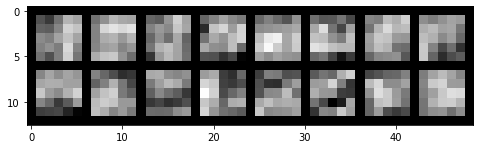

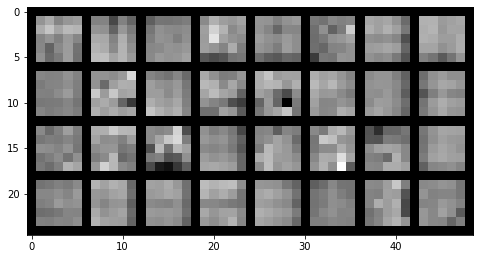

In [0]:
filters = model.layer1[0].weight.data.clone()
visTensor(filters.cpu(), ch=0, allkernels=False)
plt.ioff()

filters = model.layer2[0].weight.data.clone()
visTensor(filters.cpu(), ch=0, allkernels=False)
plt.ioff()

#### Activations visualization:

conv1


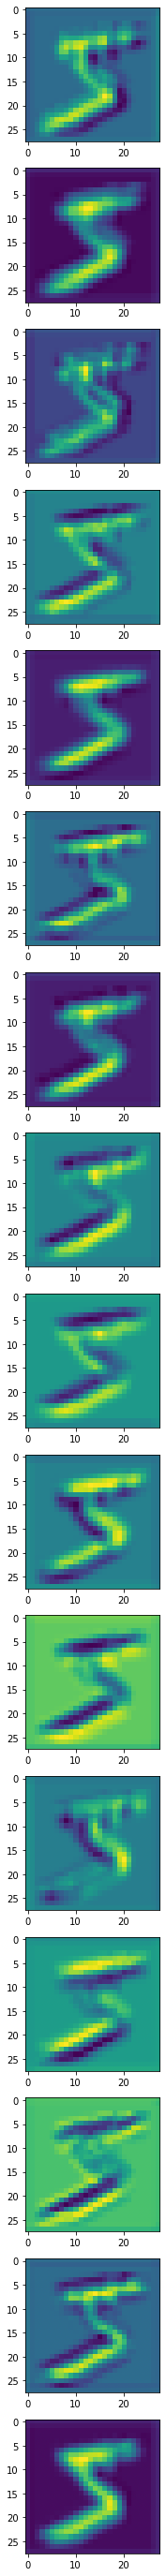

conv2


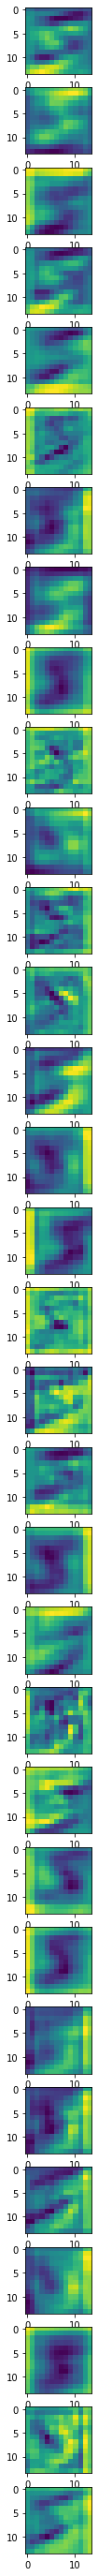

In [0]:
viz_activations(model)

#### Binary models:

### Binary models:

#### Stochastic ST first conv layer:

##### Load model:

In [0]:
# parameters model to load
# parameters no binary model
slope_annealing = False
stochastic = True
reinforce = False
binary = True
plot_result = False
first_conv_layer = True
last_conv_layer = False

# Slope annealing
if slope_annealing:
    def get_slope(number_epoch): return 1.0 * (1.005 ** (number_epoch - 1))
else:
    def get_slope(number_epoch): return 1.0
    
model, name_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
# print(model)

# load model
model.load_state_dict(load('./trained_models/MNIST/' + name_model + '.pt'))
print(name_model, ' loaded')

Stochastic_ST_first_conv_binary  loaded


##### Filters visualization:

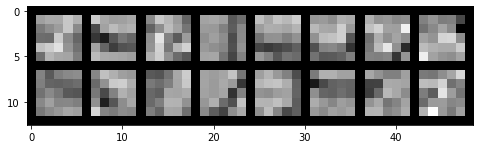

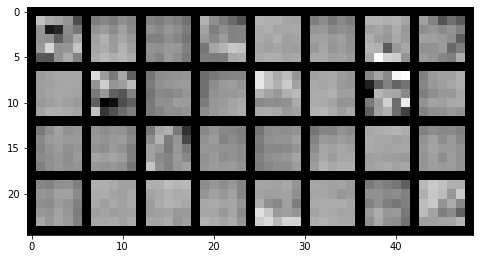

In [0]:
viz_filters(model)

##### Activations visualization:

conv1


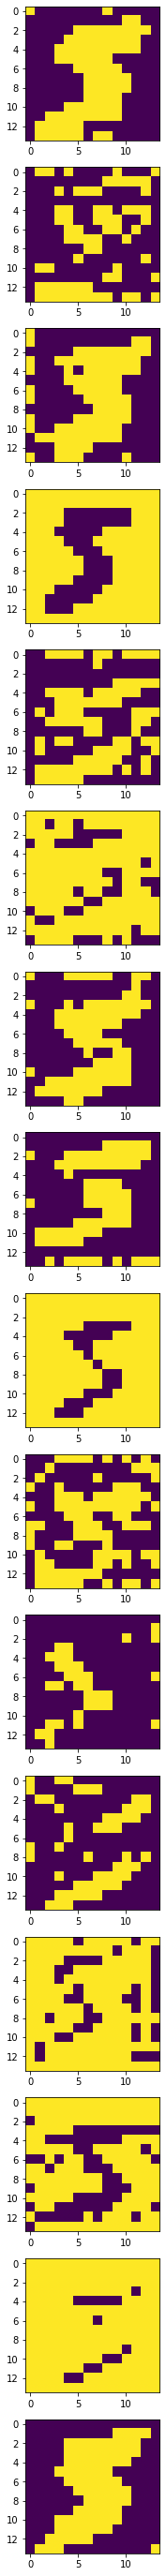

conv2


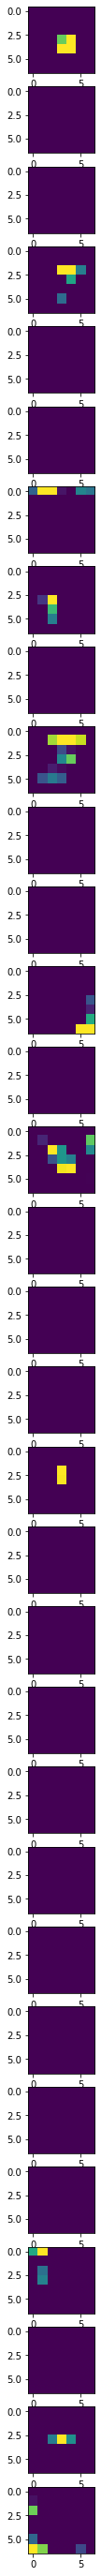

In [0]:
viz_activations(model, get_slope)

#### Stochastic ST last conv layer:

##### Load model:

In [0]:
# parameters model to load
# parameters no binary model
slope_annealing = False
stochastic = True
reinforce = False
binary = True
plot_result = False
first_conv_layer = False
last_conv_layer = True

# Slope annealing
if slope_annealing:
    def get_slope(number_epoch): return 1.0 * (1.005 ** (number_epoch - 1))
else:
    def get_slope(number_epoch): return 1.0
    
model, name_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
# print(model)

# load model
model.load_state_dict(load('./trained_models/MNIST/' + name_model + '.pt'))
print(name_model, ' loaded')

Stochastic_ST_last_conv_binary  loaded


##### Filters visualization:

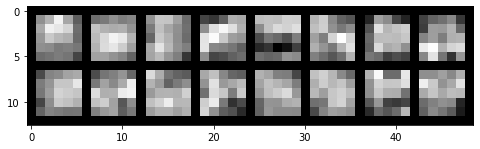

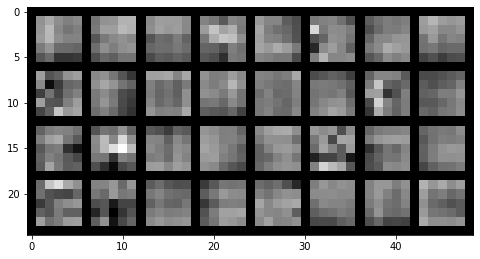

In [0]:
viz_filters(model)

##### Activations visualization:

conv1


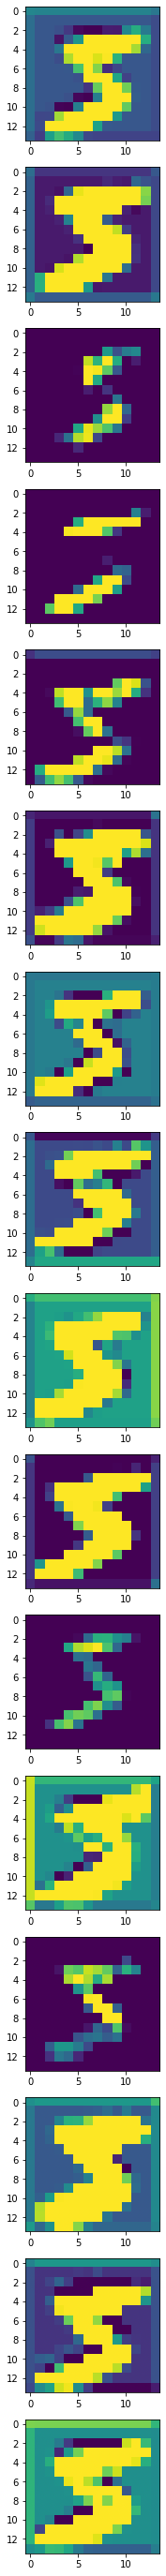

conv2


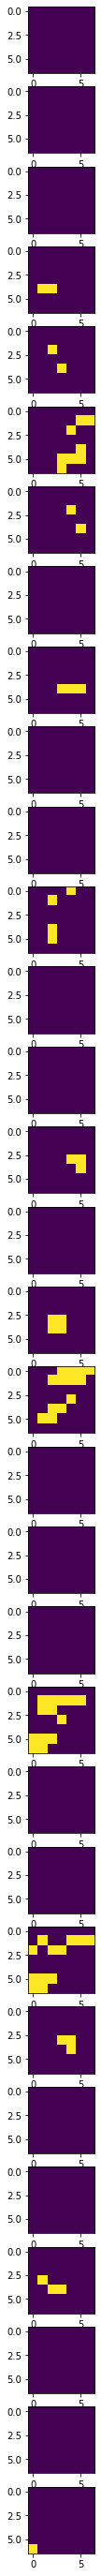

In [0]:
viz_activations(model, get_slope)

#### Stochastic ST both conv layer:

##### Load model:

In [0]:
# parameters model to load
# parameters no binary model
slope_annealing = False
stochastic = True
reinforce = False
binary = True
plot_result = False
first_conv_layer = True
last_conv_layer = True

# Slope annealing
if slope_annealing:
    def get_slope(number_epoch): return 1.0 * (1.005 ** (number_epoch - 1))
else:
    def get_slope(number_epoch): return 1.0
    
model, name_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
# print(model)

# load model
model.load_state_dict(load('./trained_models/MNIST/' + name_model + '.pt'))
print(name_model, ' loaded')

Stochastic_ST_first_conv_binary_last_conv_binary  loaded


##### Filters visualization:

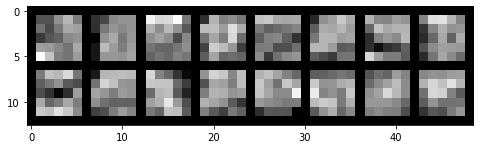

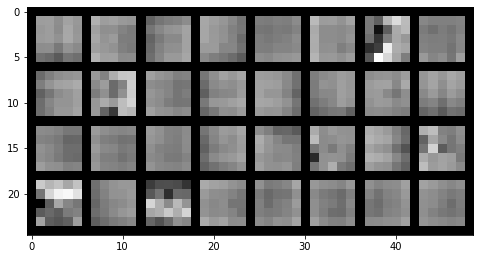

In [0]:
viz_filters(model)

##### Activations visualization:

conv1


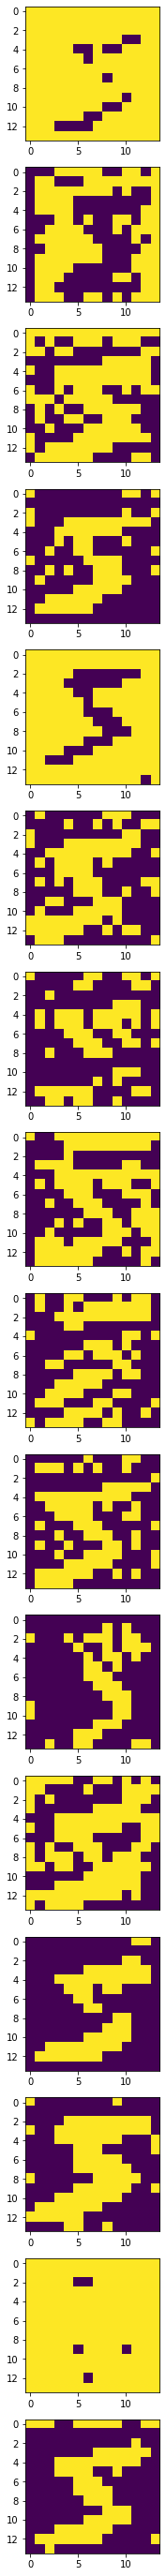

conv2


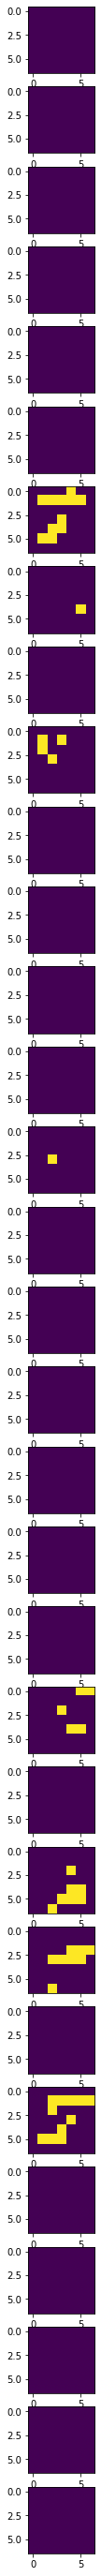

In [0]:
viz_activations(model, get_slope)

#### Stochastic REINFORCE first conv layer:

##### Load model:

In [0]:
# parameters model to load
# parameters no binary model
slope_annealing = False
stochastic = True
reinforce = True
binary = True
plot_result = False
first_conv_layer = True
last_conv_layer = False

# Slope annealing
if slope_annealing:
    def get_slope(number_epoch): return 1.0 * (1.005 ** (number_epoch - 1))
else:
    def get_slope(number_epoch): return 1.0
    
model, name_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
# print(model)

# load model
model.load_state_dict(load('./trained_models/MNIST/' + name_model + '.pt'))
print(name_model, ' loaded')

Stochastic_REINFORCE_first_conv_binary  loaded


##### Filters visualization:

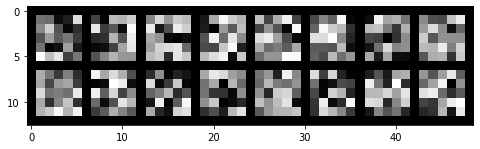

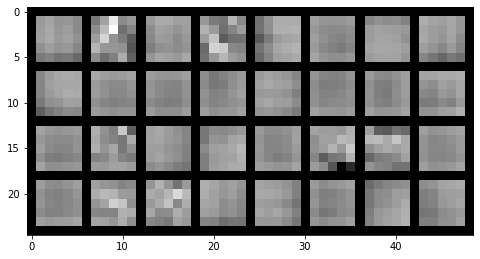

In [0]:
viz_filters(model)

##### Activations visualization:

conv1


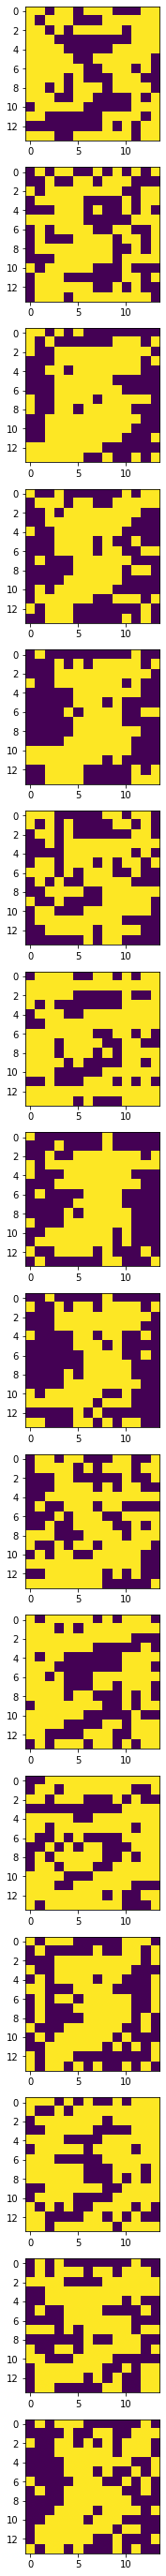

conv2


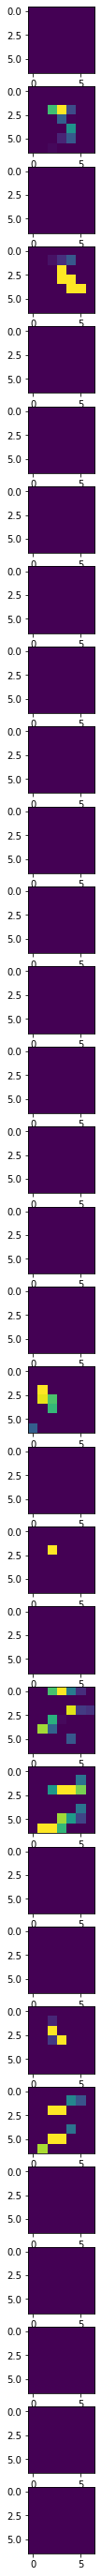

In [0]:
viz_activations(model, get_slope)

#### Stochastic REINFORCE last conv layer:

##### Load model:

In [0]:
# parameters model to load
# parameters no binary model
slope_annealing = False
stochastic = True
reinforce = True
binary = True
plot_result = False
first_conv_layer = False
last_conv_layer = True

# Slope annealing
if slope_annealing:
    def get_slope(number_epoch): return 1.0 * (1.005 ** (number_epoch - 1))
else:
    def get_slope(number_epoch): return 1.0
    
model, name_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
# print(model)

# load model
model.load_state_dict(load('./trained_models/MNIST/' + name_model + '.pt'))
print(name_model, ' loaded')

Stochastic_REINFORCE_last_conv_binary  loaded


##### Filters visualization:

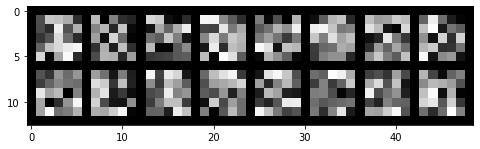

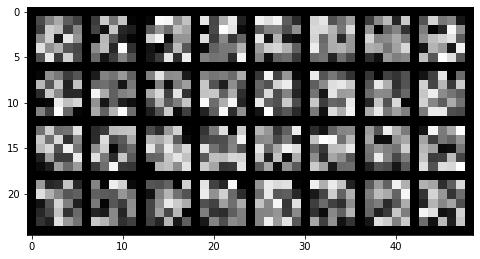

In [0]:
viz_filters(model)

##### Activations visualization:

conv1


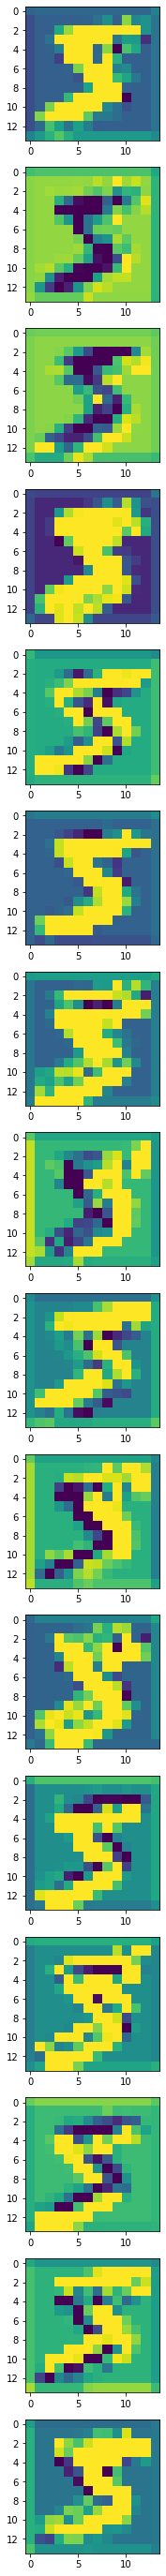

conv2


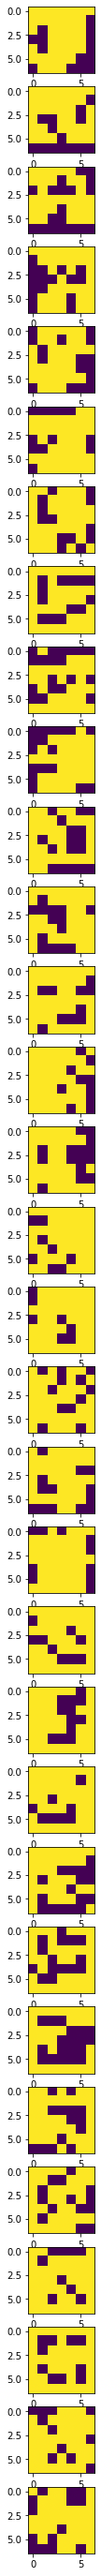

In [0]:
viz_activations(model, get_slope)

#### Stochastic REINFORCE both conv layer:

##### Load model:

In [0]:
# parameters model to load
# parameters no binary model
slope_annealing = False
stochastic = True
reinforce = True
binary = True
plot_result = False
first_conv_layer = True
last_conv_layer = True

# Slope annealing
if slope_annealing:
    def get_slope(number_epoch): return 1.0 * (1.005 ** (number_epoch - 1))
else:
    def get_slope(number_epoch): return 1.0
    
model, name_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
# print(model)

# load model
model.load_state_dict(load('./trained_models/MNIST/' + name_model + '.pt'))
print(name_model, ' loaded')

Stochastic_REINFORCE_first_conv_binary_last_conv_binary  loaded


##### Filters visualization:

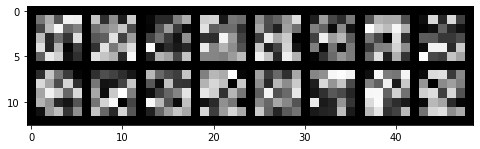

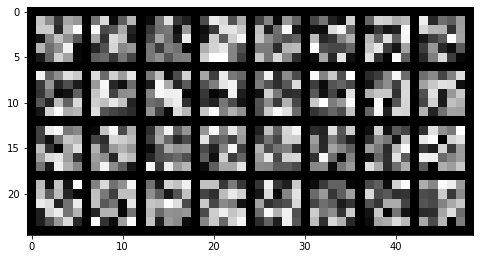

In [0]:
viz_filters(model)

##### Activations visualization:

conv1


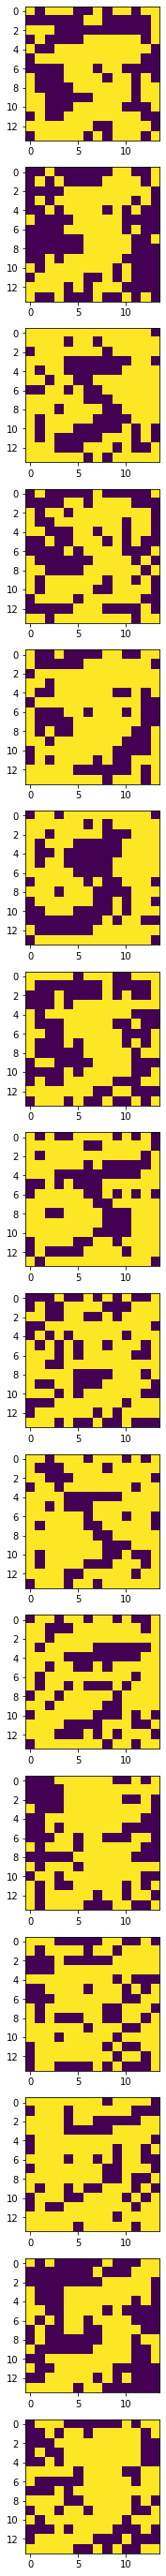

conv2


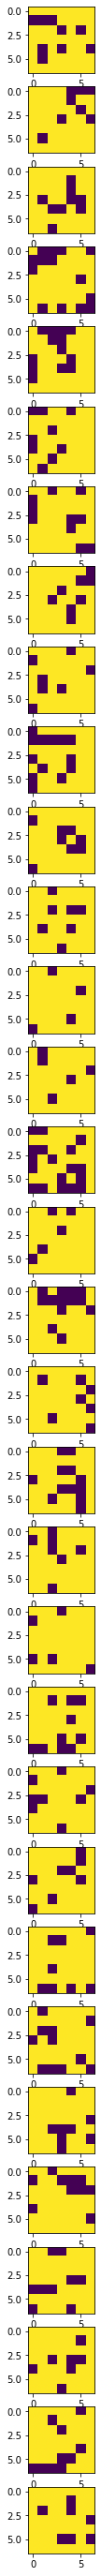

In [0]:
viz_activations(model, get_slope)

#### Deterministic ST first conv layer:

##### Load model:

In [0]:
# parameters model to load
# parameters no binary model
slope_annealing = False
stochastic = False
reinforce = False
binary = True
plot_result = False
first_conv_layer = True
last_conv_layer = False

# Slope annealing
if slope_annealing:
    def get_slope(number_epoch): return 1.0 * (1.005 ** (number_epoch - 1))
else:
    def get_slope(number_epoch): return 1.0
    
model, name_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
# print(model)

# load model
model.load_state_dict(load('./trained_models/MNIST/' + name_model + '.pt'))
print(name_model, ' loaded')

Deterministic_ST_first_conv_binary  loaded


##### Filters visualization:

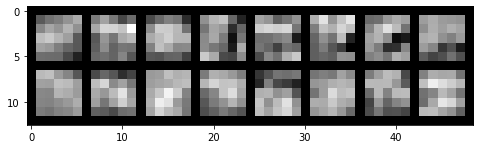

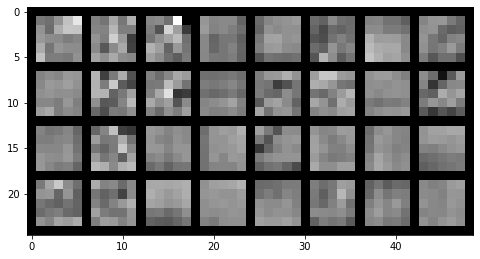

In [0]:
viz_filters(model)

##### Activations visualization:

conv1


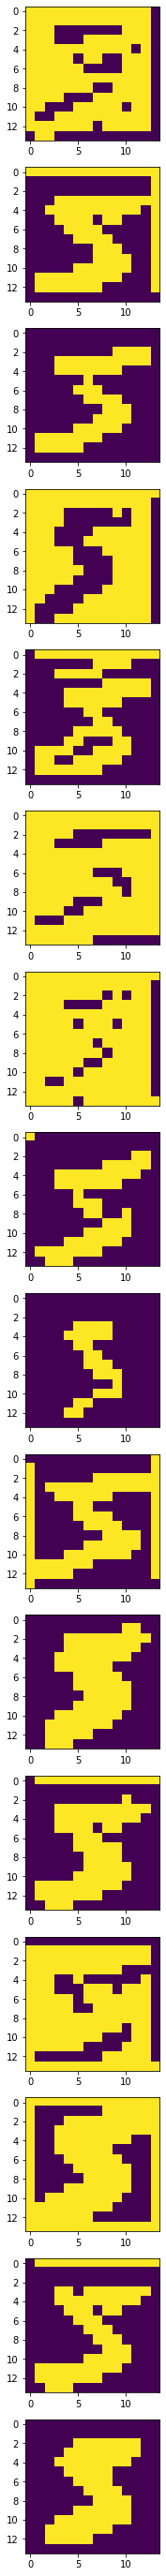

conv2


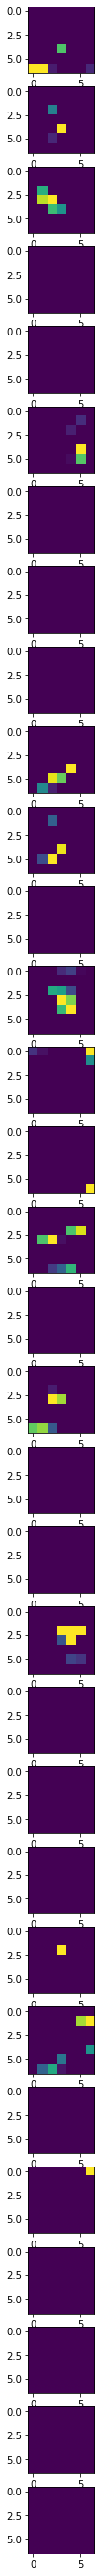

In [0]:
viz_activations(model, get_slope)

#### Deterministic ST last conv layer:

##### Load model:

In [0]:
# parameters model to load
# parameters no binary model
slope_annealing = False
stochastic = False
reinforce = False
binary = True
plot_result = False
first_conv_layer = False
last_conv_layer = True

# Slope annealing
if slope_annealing:
    def get_slope(number_epoch): return 1.0 * (1.005 ** (number_epoch - 1))
else:
    def get_slope(number_epoch): return 1.0
    
model, name_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
# print(model)

# load model
model.load_state_dict(load('./trained_models/MNIST/' + name_model + '.pt'))
print(name_model, ' loaded')

Deterministic_ST_last_conv_binary  loaded


##### Filters visualization:

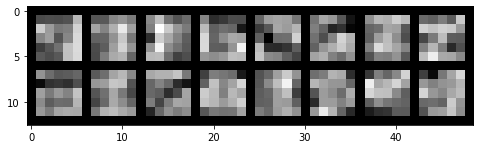

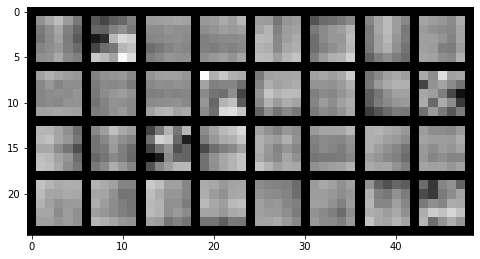

In [0]:
viz_filters(model)

##### Activations visualization:

conv1


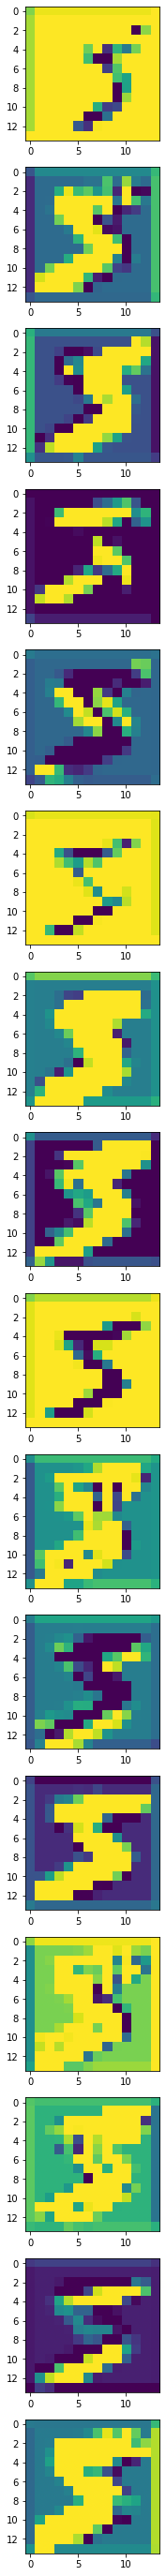

conv2


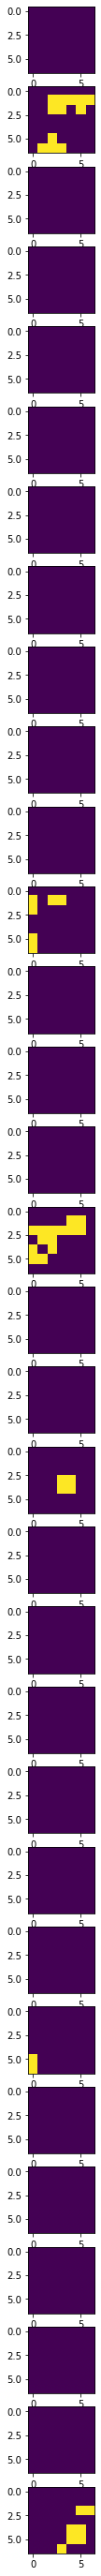

In [0]:
viz_activations(model, get_slope)

#### Deterministic ST both conv layer:

##### Load model:

In [0]:
# parameters model to load
# parameters no binary model
slope_annealing = False
stochastic = False
reinforce = False
binary = True
plot_result = False
first_conv_layer = True
last_conv_layer = True

# Slope annealing
if slope_annealing:
    def get_slope(number_epoch): return 1.0 * (1.005 ** (number_epoch - 1))
else:
    def get_slope(number_epoch): return 1.0
    
model, name_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
# print(model)

# load model
model.load_state_dict(load('./trained_models/MNIST/' + name_model + '.pt'))
print(name_model, ' loaded')

Deterministic_ST_first_conv_binary_last_conv_binary  loaded


##### Filters visualization:

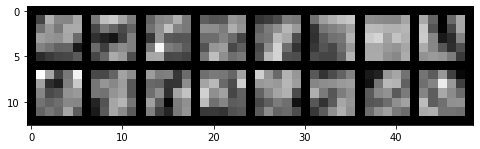

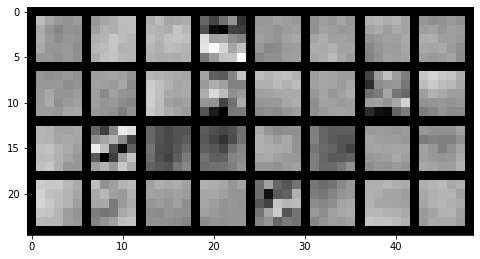

In [0]:
viz_filters(model)

##### Activations visualization:

conv1


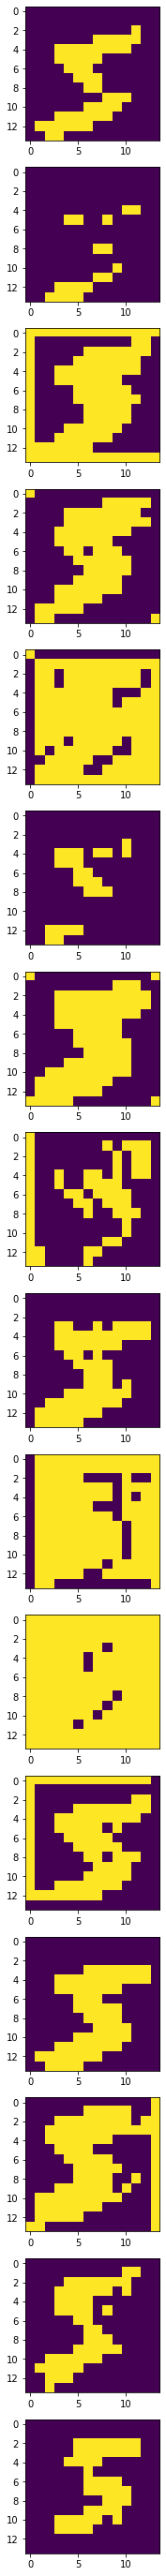

conv2


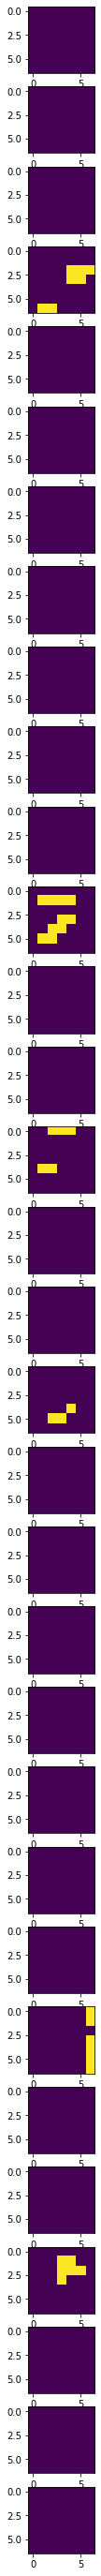

In [0]:
viz_activations(model, get_slope)

#### Deterministic REINFORCE first conv layer:

##### Load model:

In [0]:
# parameters model to load
# parameters no binary model
slope_annealing = False
stochastic = False
reinforce = True
binary = True
plot_result = False
first_conv_layer = True
last_conv_layer = False

# Slope annealing
if slope_annealing:
    def get_slope(number_epoch): return 1.0 * (1.005 ** (number_epoch - 1))
else:
    def get_slope(number_epoch): return 1.0
    
model, name_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
# print(model)

# load model
model.load_state_dict(load('./trained_models/MNIST/' + name_model + '.pt'))
print(name_model, ' loaded')

Deterministic_REINFORCE_first_conv_binary  loaded


##### Filters visualization:

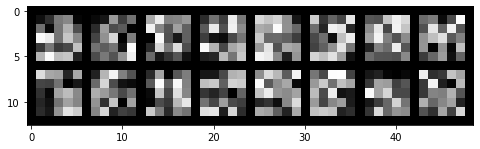

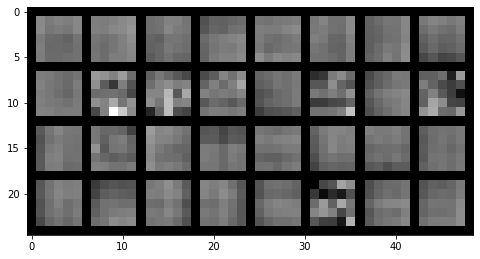

In [0]:
viz_filters(model)

##### Activations visualization:

conv1


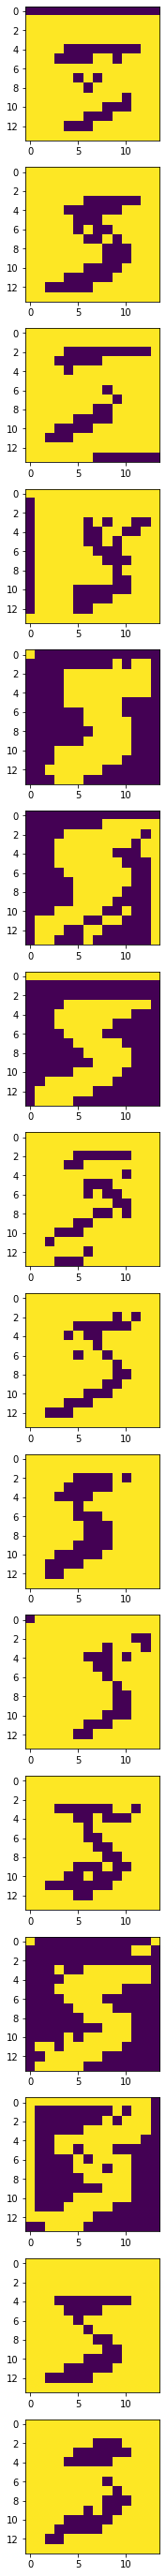

conv2


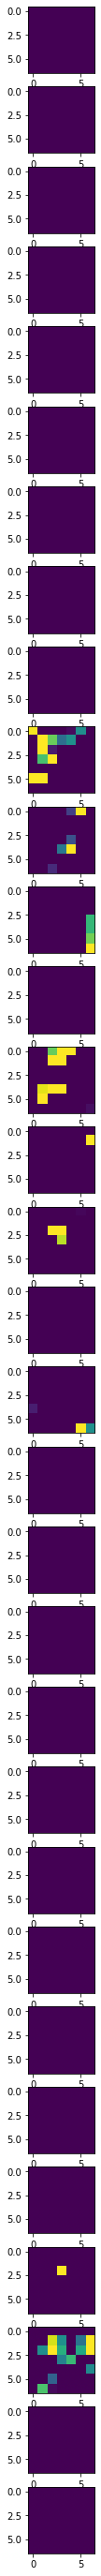

In [0]:
viz_activations(model, get_slope)

#### Deterministic REINFORCE last conv layer:

##### Load model:

In [0]:
# parameters model to load
# parameters no binary model
slope_annealing = False
stochastic = False
reinforce = True
binary = True
plot_result = False
first_conv_layer = False
last_conv_layer = True

# Slope annealing
if slope_annealing:
    def get_slope(number_epoch): return 1.0 * (1.005 ** (number_epoch - 1))
else:
    def get_slope(number_epoch): return 1.0
    
model, name_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
# print(model)

# load model
model.load_state_dict(load('./trained_models/MNIST/' + name_model + '.pt'))
print(name_model, ' loaded')

Deterministic_REINFORCE_last_conv_binary  loaded


##### Filters visualization:

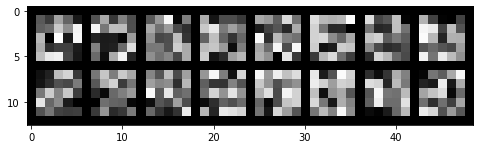

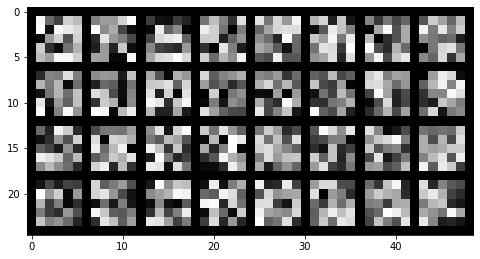

In [0]:
viz_filters(model)

##### Activations visualization:

conv1


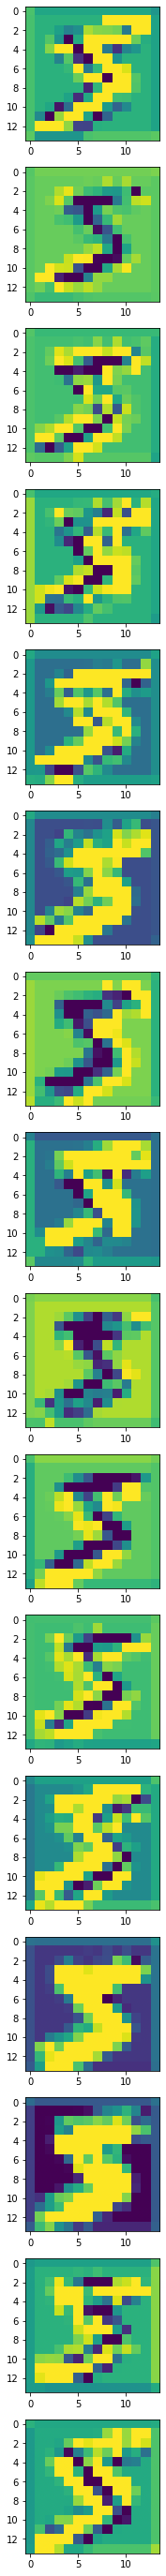

conv2


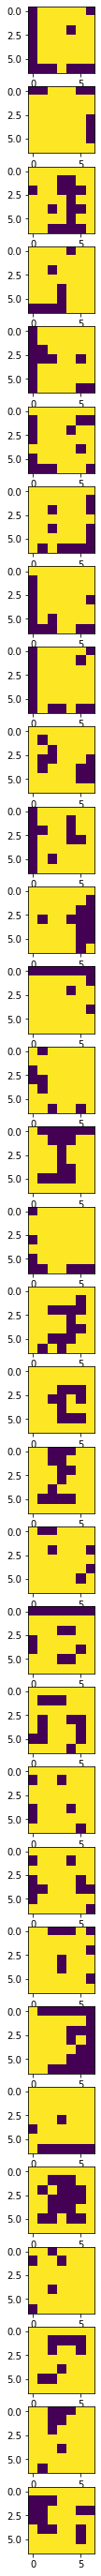

In [0]:
viz_activations(model, get_slope)

#### Deterministic REINFORCE both conv layer:

##### Load model:

In [0]:
# parameters model to load
# parameters no binary model
slope_annealing = False
stochastic = False
reinforce = True
binary = True
plot_result = False
first_conv_layer = True
last_conv_layer = True

# Slope annealing
if slope_annealing:
    def get_slope(number_epoch): return 1.0 * (1.005 ** (number_epoch - 1))
else:
    def get_slope(number_epoch): return 1.0
    
model, name_model = get_my_model(binary, stochastic, reinforce, 
                                  first_conv_layer, last_conv_layer)
# print(model)

# load model
model.load_state_dict(load('./trained_models/MNIST/' + name_model + '.pt'))
print(name_model, ' loaded')

Deterministic_REINFORCE_first_conv_binary_last_conv_binary  loaded


##### Filters visualization:

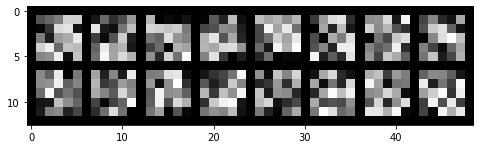

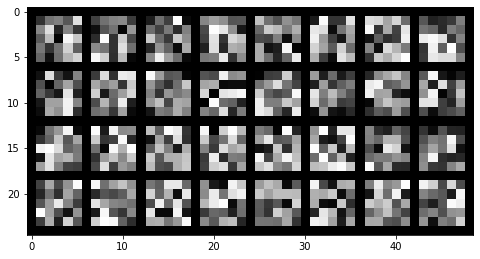

In [0]:
viz_filters(model)

##### Activations visualization:

conv1


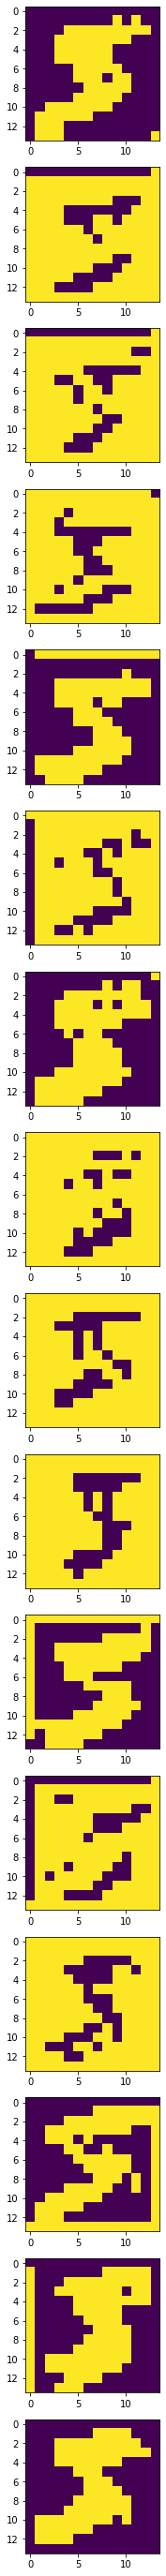

conv2


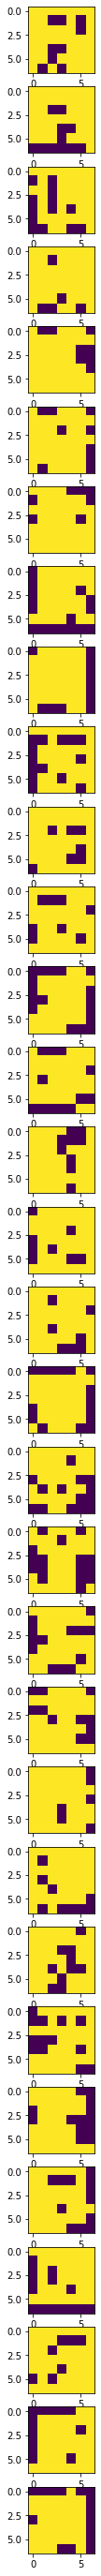

In [0]:
viz_activations(model, get_slope)

# Omniglot binary

## Import

In [0]:
from torch.cuda import is_available
import torch.optim as optim
from DataLoader.dataLoaders import get_omniglot_dataloaders
from utils.training import training, test, gpu_config
from torch import load
from visualize.viz import visTensor, visualize_activations
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch

from utils.models import NonBinaryNet, BinaryNet

import numpy as np

## Parameters default values

In [0]:
lr = 0.1
momentum = 0.9
nb_epoch = 10
batch_size_train = 64
batch_size_test = 1000
slope_annealing = False
reinforce = False
stochastic = True
binary = True
plot_result = True
first_conv_layer = False
last_conv_layer = False
omniglto = False

## Define dataset

In [6]:
train_loader, test_loader = get_omniglot_dataloaders(batch_size_train, batch_size_test)

Extracting ./data/omniglot-py/images_background.zip to ./data/omniglot-py



Extracting ./data/omniglot-py/images_evaluation.zip to ./data/omniglot-py

Number of training examples: 302
Number of testing examples: 14


## Define my model

In [0]:
# Model, activation type, estimator type
def get_my_model(omniglot, binary, stochastic, reinforce, first_conv_layer,
                 last_conv_layer):
    if binary:
        if stochastic:
            mode = 'Stochastic'
            names_model = 'Stochastic'
        else:
            mode = 'Deterministic'
            names_model = 'Deterministic'
        if reinforce:
            estimator = 'REINFORCE'
            names_model += '_REINFORCE'
        else:
            estimator = 'ST'
            names_model += '_ST'
        if first_conv_layer:
            names_model += '_first_conv_binary'
        if last_conv_layer:
            names_model += '_last_conv_binary'
        if omniglot:
            names_model += '_omniglot'
        model = BinaryNet(omniglot=omniglot, first_conv_layer=first_conv_layer, 
                          last_conv_layer=last_conv_layer, mode=mode, 
                          estimator=estimator)
    else:
        model = NonBinaryNet(omniglot=omniglot)
        names_model = 'NonBinaryNet'
        if omniglot:
              names_model += '_omniglot'
        mode = None
        estimator = None

    # gpu config:
    model, use_gpu = gpu_config(model)
    return model, names_model, use_gpu

## Train

### Train no binary model

In [0]:
# parameters no binary model
slope_annealing = False
stochastic = False
reinforce = False
binary = False
plot_result = True
first_conv_layer = False
last_conv_layer = False
omniglto = True

# Slope annealing
if slope_annealing:
    def get_slope(number_epoch): return 1.0 * (1.005 ** (number_epoch - 1))
else:
    def get_slope(number_epoch): return 1.0
    
model, names_model, use_gpu = get_my_model(omniglto, binary, stochastic, 
                                           reinforce, first_conv_layer, 
                                           last_conv_layer)

print(names_model)
# print(model)

# optimizer
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_loss, train_acc, val_loss, val_acc = training(use_gpu, model, names_model,
                                                    nb_epoch, train_loader, 
                                                    test_loader, optimizer, 
                                                    plot_result, get_slope)

# test
model.load_state_dict(load('./trained_models/MNIST/' + names_model + '.pt'))
test_loss, test_acc = test(use_gpu, model, test_loader, get_slope, epoch=0)

results_binary_models[names_model + '_loss'] = test_loss
results_binary_models[names_model + '_acc'] = test_acc